## Clustering Algorithms in Python
https://machinelearningmastery.com/clustering-algorithms-with-python/

## 10 popular algorithms
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

Each algorithm offers a different approach to the challenge of discovering natural groups in data.
There is no best clustering algorithm, and no easy way to find the best algorithm for your data without using controlled experiments

In [1]:
#library
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


## Clustering Dataset
We will use the make_classification() function to create a test binary classification dataset.
The dataset will have 1,000 examples, with two(2) input features and one(1) cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.
The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters. As such, the results in this tutorial should not be used as the basis for comparing the methods generally.
An example of creating and summarizing the synthetic clustering dataset is listed below.

In [3]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [5]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
print(X[0:5], y[0:5])

[[ 1.22515974 -0.95173116]
 [ 1.01630365 -1.72517506]
 [ 0.33534004 -1.7248955 ]
 [ 1.78634822 -1.78265314]
 [ 1.01675094  1.06256946]] [1 1 1 1 1]


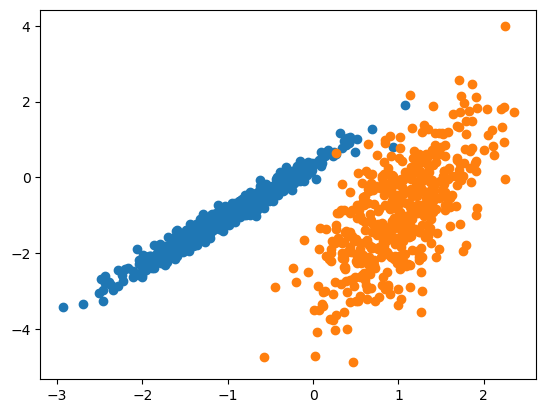

In [7]:
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
     row_ix = where(y == class_value)
     # create scatter of these samples
     plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show();

Running the example creates the synthetic clustering dataset, then creates a scatter plot of the input data with points colored by class label (idealized clusters).
We can clearly see two distinct groups of data in two dimensions and the hope would be that an automatic clustering algorithm can detect these groupings.
Next, we can start looking at examples of clustering algorithms applied to this dataset.

### Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

### Agglomerative Clustering
Agglomerative clustering involves merging (n to 1) examples until the desired number of clusters is achieved.
t is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 2.

In [9]:
from numpy import unique
from sklearn.cluster import AgglomerativeClustering

In [10]:
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

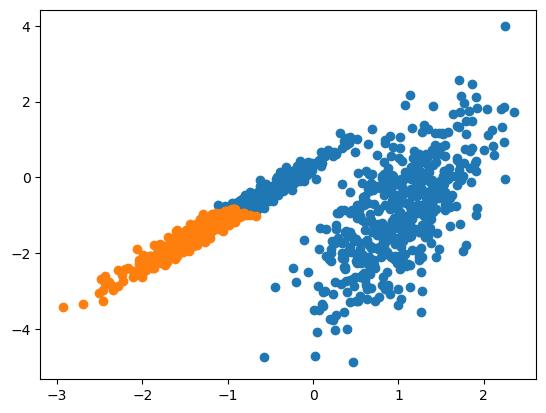

In [11]:
# create scatter plot for samples from each cluster
for cluster in clusters:
     # get row indexes for samples with this cluster
     row_ix = where(yhat == cluster)
     # create scatter of these samples
     plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show();
# fits the model on the training dataset and predicts a cluster for each example in the dataset. 
# A scatter plot is then created with points colored by their assigned cluster.